In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

sns.set_style('darkgrid')

In [2]:
data = datasets.load_boston()

In [3]:
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])

In [4]:
# Checking initial values
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df['price'] = data['target']

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Renaming columns for easier understanding**

In [7]:
df.columns = ['crime per capita', 'residential land', 'business area', 'charles river', 'nitric oxide', 'rooms per dwelling', 'owner-occupied units', 'distance from center', 'access to highway','property-tax rate','pupil-teacher ratio','proportion of blacks','lower status','price']

In [8]:
df.head()

,crime per capita,residential land,business area,charles river,nitric oxide,rooms per dwelling,owner-occupied units,distance from center,access to highway,property-tax rate,pupil-teacher ratio,proportion of blacks,lower status,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Check for null values in dataset**

In [9]:
df.isnull().sum()

crime per capita        0
residential land        0
business area           0
charles river           0
nitric oxide            0
rooms per dwelling      0
owner-occupied units    0
distance from center    0
access to highway       0
property-tax rate       0
pupil-teacher ratio     0
proportion of blacks    0
lower status            0
price                   0
dtype: int64

## Check for distribution in dataset

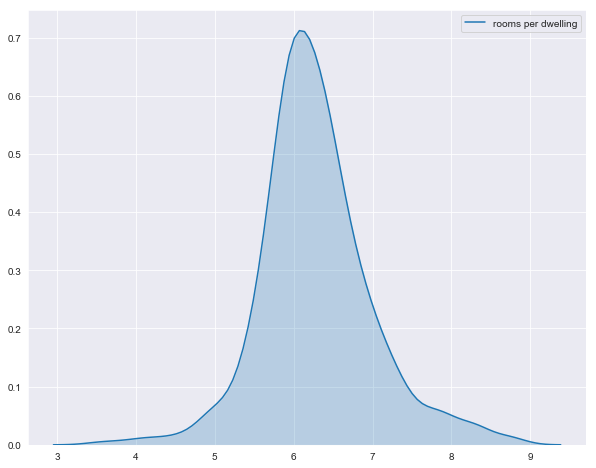

In [10]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['rooms per dwelling'], shade=True)

Average rooms per dwelling range from 6-7 rooms

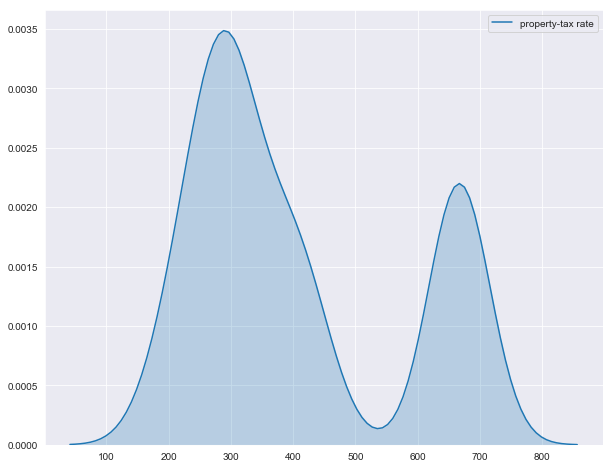

In [11]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['property-tax rate'], shade=True)

Property tax rate are ranged in two major regions around 300 and around 650

## **Scatter plot to see how features affect price**

### Business land and access to higway affecting price

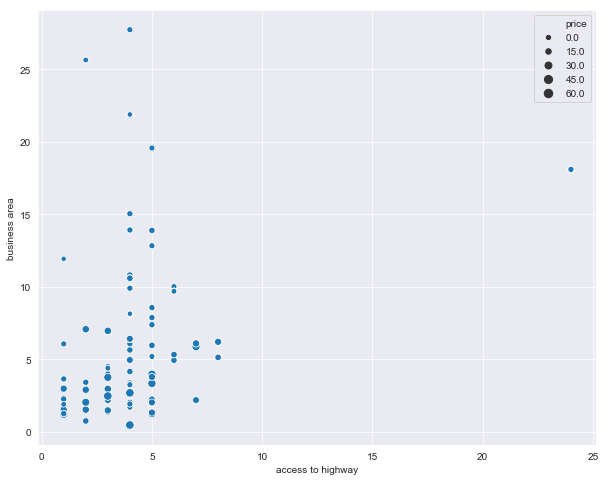

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='access to highway',y='business area',size='price',data=df)

**Areas closer to the highway costs more independent of business land**

### **Pupil teacher ratio affect price**

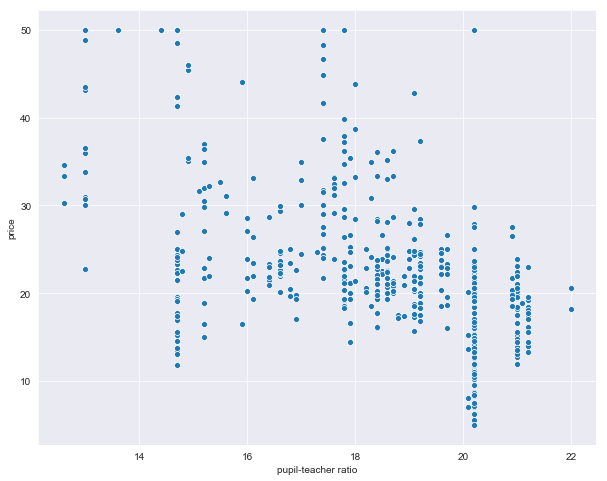

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='pupil-teacher ratio',y='price',data=df)

When Teacher to pupil ratio is high then price is high

### Distance from Boston employment center

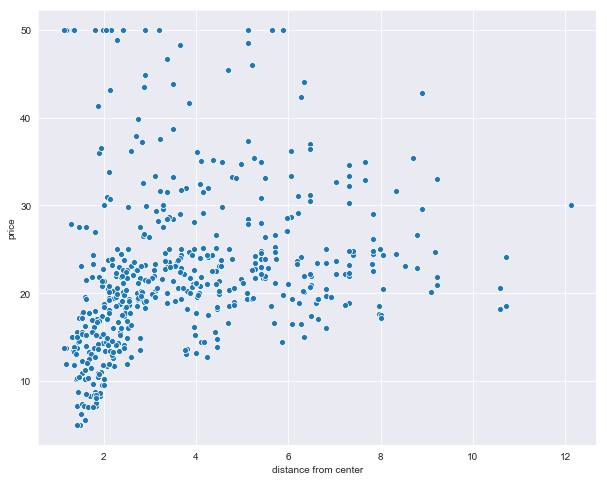

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='distance from center',y='price',data=df)

Distance from the Boston employment center is not much affecting the price. Prices are high up to 6 units.

### Property tax affecting the price

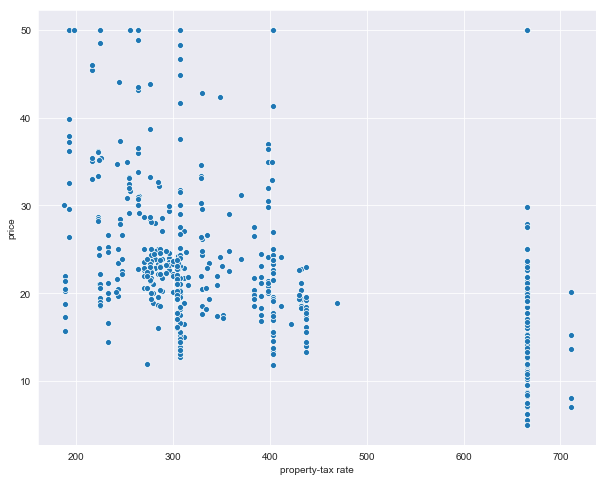

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='property-tax rate',y='price',data=df)

Lower Property taxes cause for higher housing prices

## Taking a look into relationships using pairplot

<Figure size 1080x1080 with 0 Axes>

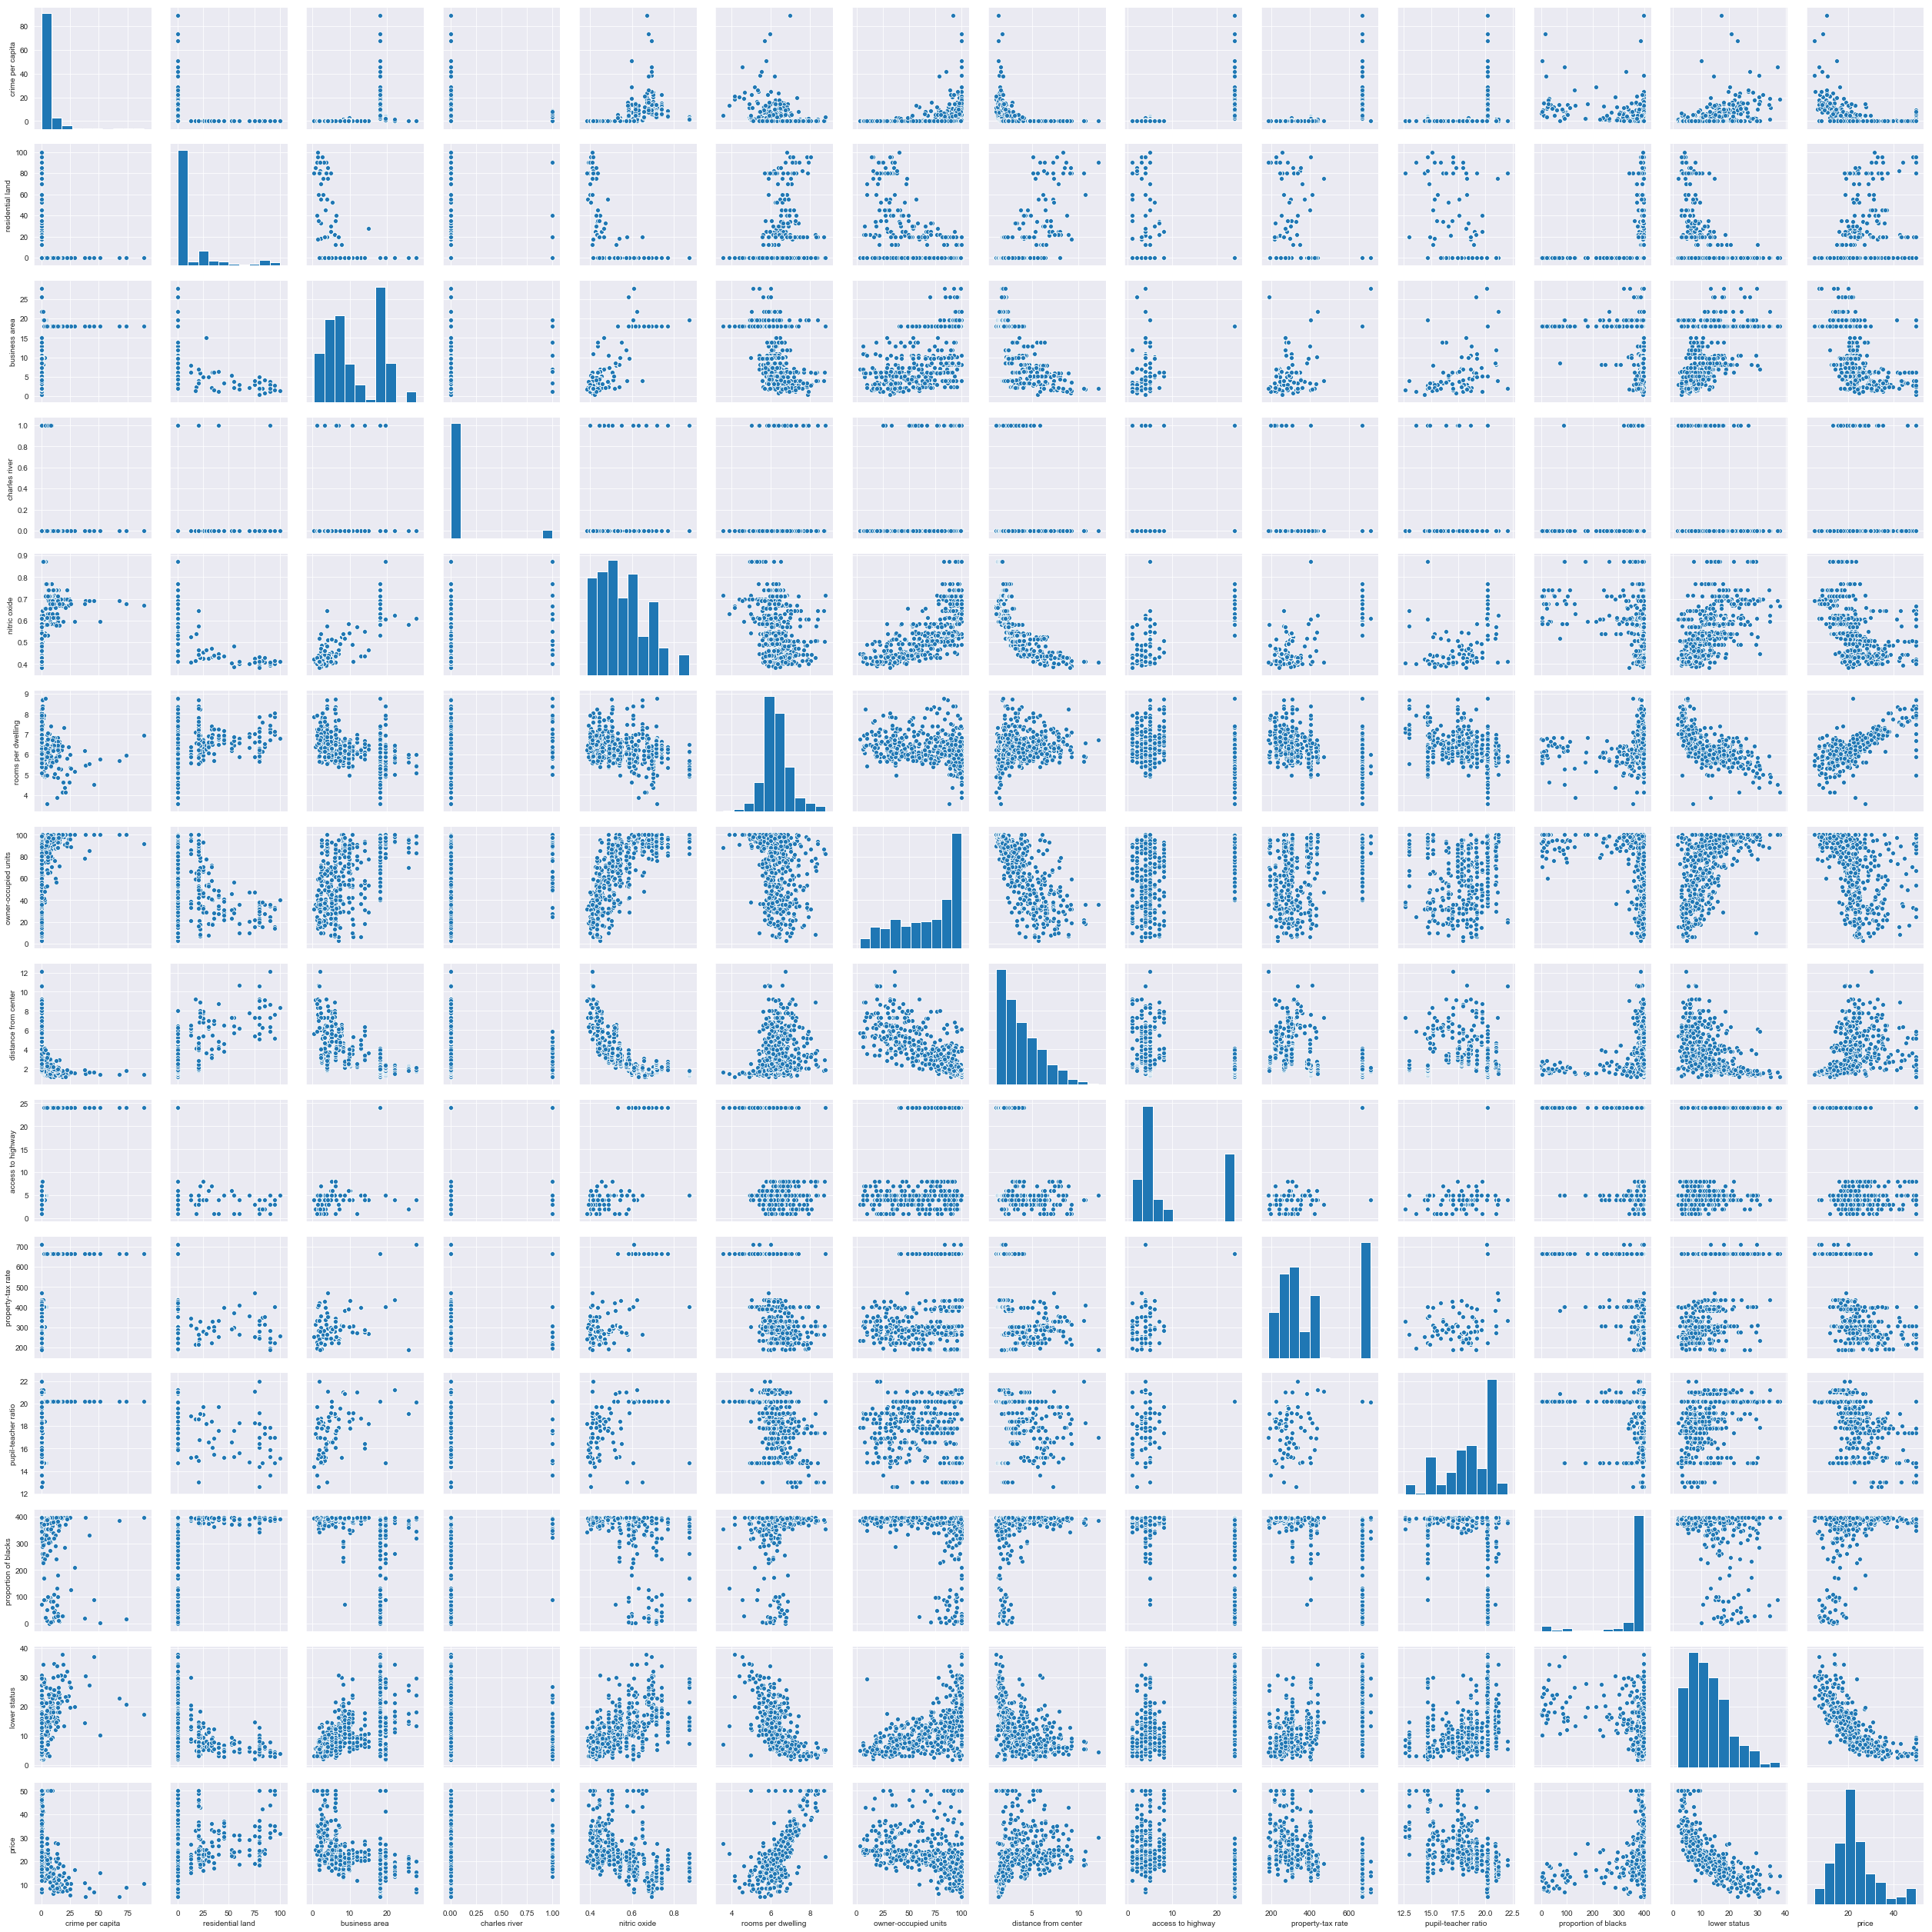

In [16]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df)

- There is almost linear relationship between housing prices and rooms per dwelling.
- For Obvious reasons, more  the % lower status of the population, lower the house prices.

### Taking a look if having a highway close to housing land affects price

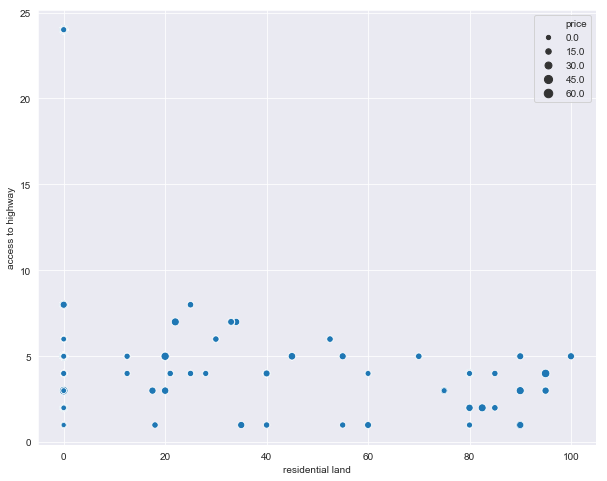

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='residential land',y='access to highway',size='price',data=df)

Access to highway has more impact on the price then the residential land.

## Let's confirm our analysis by correlation matrix 

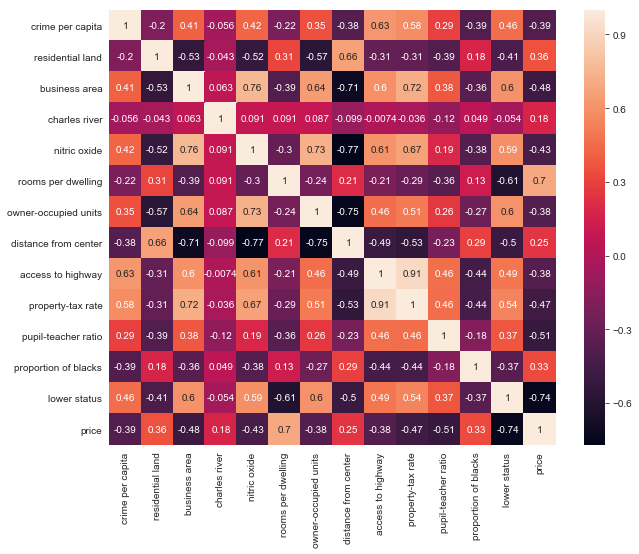

In [18]:
plt.figure(figsize=(10,8))
corr= df.corr()
sns.heatmap(corr, annot=True)

1. Status of the people affect the price the most.
2. Rooms per dwelling affect the price second most.
3. Access to highway has more impact on price then residential land.
4. Property tax has a good impact on the prices.